# Particle Filter
## Task 1
Create the Particle set of size $N=1000$ and with equal weights, given that $x\sim \mathcal{N}(0,1)$.

Plot the histogram of values.

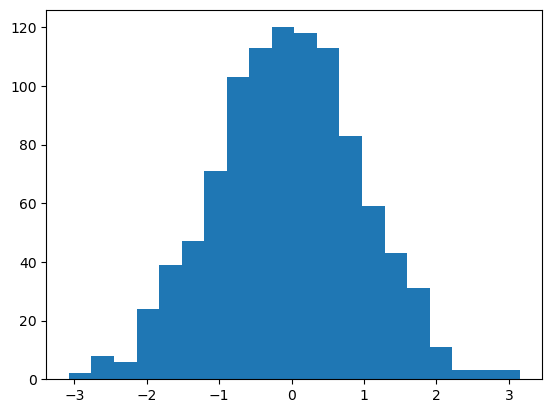

In [8]:
import numpy as np
import matplotlib.pyplot as plt
X = np.random.randn(1000)
plt.hist(X, bins=20)
plt.show()

## Task 2
Propagate the particle set, given the following 1d system: $y = (x+\eta)^2$, where $\eta\sim\mathcal{N}(0,2)$ and obtain $\bar{\text{bel}}(y)$

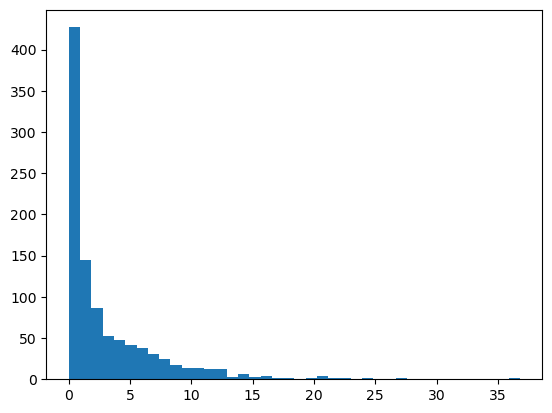

In [9]:
U = np.random.randn(1000)*np.sqrt(2)
Y = (X+U)**2
plt.hist(Y, bins=40)
plt.show()

What can you say about this PDF?

## Task 3
Now, let's consider the observation function $h(y) = y$, the probablistic model for the likelihoos $p(z|y) = \mathcal{N}(z;h(y),2^2)$ and the observation $z=5$. Calculate the new weighs of the particle set that represent the posterior belief $\text{bel}(y)$

In [7]:
from scipy.stats import norm
W = np.zeros(1000)
count = 0
for i in range(1000):
    # norm.pdf(x, loc, scale) is equivalent to norm.pdf(y) / scale with y = (x - loc) / scale (std).
    W[i] = norm.pdf(Y[i],5,2)
N = np.sum(W)
W = W/N
for i in range(1000):
    if W[i] < 1e-3:
        count +=1
print('mean of propagated = ', np.mean(Y))
print('mean of posterior = ', np.sum(Y*W), 'and number of active elements =', count)


mean of propagated =  3.024536255800859
mean of posterior =  3.653192768893873 and number of active elements = 664


Q: What is the mean of the new particle set?

Q: How many particles have a small weight (<1e-3 for instance)? How can this be a problem?